## Rounded Micro Domain

The micro domain is defined by a bounding box and a smooth function parameterising the floor of the micro domain. 

In [1]:
import sys
sys.path.append('/home/emastr/phd/')

import torch
from boundary_solvers.gauss_grid_2d import *
from boundary_solvers.geometry import *
import numpy as np
import matplotlib.pyplot as plt
from util.plot_tools import *
from boundary_solvers.blobs import *

## Generating a data set

In [ ]:
np.random.seed(0)
N = 2000

avg1 = lambda a, b: np.real(b**2 - a**2)/2
avg2 = lambda a, b: np.imag((b-a)**2)/np.abs(b-a)

err1 = []
err2 = []
for i in range(N):
    print(f"{i+1}/{N} done", end="\n")
    mg = GPDomain("exp", 
                  shape=.05, 
                  num=20, 
                  scale=.05, 
                  bound=.3, 
                  width=1, 
                  height=1, 
                  corner_w = 0.3,
                  line_pos=np.random.rand()*0.4 + 0.2, 
                  n_refine=2,#1, 
                  n_corner_refine=0)    
    
    r1, func1 = mg.precompute_line_avg(derivative=0, tol=1e-12, maxiter=200, verbose=True)
    r2, func2    = mg.precompute_line_avg(derivative=1, tol=1e-12, maxiter=200, verbose=True)
    r3, _    = mg.line_eval_adjoint(derivative=0, tol=1e-12, maxiter=200, verbose=True)
    r4, _    = mg.line_eval_adjoint(derivative=1, tol=1e-12, maxiter=200, verbose=True)
    
    
    c = 1j + 1
    vec = np.conjugate(mg.eval_param()) - c
    a = mg.line_pos * 1j - 0.45 * mg.width - c
    b = mg.line_pos * 1j + 0.45 * mg.width - c
    
    f1, f2 = func1(vec), func2(vec)
    a1, a2 = avg1(a,b),  avg2(a,b)
    e1, e2 = abs(f1-a1), abs(f2-a2)
    print(f"numerical: {f1}, true: {a1}, err: {e1:e}")
    print(f"numerical: {f2}, true: {a2}, err: {e2:e}")
    
    mg.data["riesz_vec"]     = r1
    mg.data["riesz_vec_der"] = r2
    mg.data["line_eval_adjoint"] = r3
    mg.data["line_eval_der_adjoint"] = r4
    
    err1.append(e1)
    err2.append(e2)
    mg.save(f"/home/emastr/phd/data/rounded_micro_domains_w_riesz_vectors/domain_hd_{i}.GPDomain")

1/2000 done
Converged in 0 iterations
Converged in 0 iterations
numerical: -0.8999999385004186, true: -0.9, err: 6.149958e-08
numerical: -4.371780759626631e-08, true: 0.0, err: 4.371781e-08
2/2000 done
Converged in 0 iterations
Converged in 0 iterations
numerical: -0.8999999669648883, true: -0.9, err: 3.303511e-08
numerical: 2.271120624897094e-09, true: 0.0, err: 2.271121e-09
3/2000 done
Converged in 0 iterations
Converged in 0 iterations
numerical: -0.8999999581830704, true: -0.8999999999999999, err: 4.181693e-08
numerical: 1.2094868662160252e-08, true: 0.0, err: 1.209487e-08
4/2000 done
Converged in 0 iterations
Converged in 0 iterations
numerical: -0.8999999454784677, true: -0.9, err: 5.452153e-08
numerical: -8.825891129049523e-10, true: 0.0, err: 8.825891e-10
5/2000 done


Error for 2 times nply refine 

(array([0.00136432, 0.        , 0.        , 0.00682158, 0.00545726,
        0.01910042, 0.04911537, 0.11869547, 0.27968473, 0.55936946,
        0.98230735, 0.55118357, 0.07230874, 0.03547221, 0.01500747,
        0.0177361 , 0.00818589, 0.00545726, 0.        , 0.00136432]),
 array([-11.74496754, -11.37848346, -11.01199938, -10.64551531,
        -10.27903123,  -9.91254716,  -9.54606308,  -9.17957901,
         -8.81309493,  -8.44661086,  -8.08012678,  -7.7136427 ,
         -7.34715863,  -6.98067455,  -6.61419048,  -6.2477064 ,
         -5.88122233,  -5.51473825,  -5.14825418,  -4.7817701 ,
         -4.41528602]),
 <BarContainer object of 20 artists>)

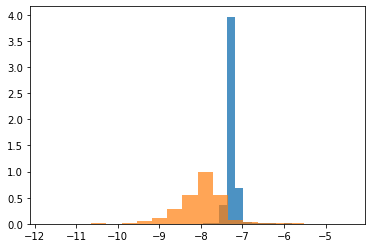

In [19]:
plt.hist([np.log10(e) for e in err1], bins=20, density=True, alpha=0.8)
plt.hist([np.log10(e) for e in err2], bins=20, density=True, alpha=0.7)

Error for 1 times nply refine

(array([0.00561911, 0.00786676, 0.01910499, 0.05169585, 0.12474433,
        0.22925985, 0.28432716, 0.24274572, 0.23600278, 0.22364073,
        0.21914544, 0.20565957, 0.17868782, 0.11125846, 0.06068643,
        0.03708615, 0.00786676, 0.00112382, 0.        , 0.00112382]),
 array([-10.1292961 ,  -9.6843861 ,  -9.23947609,  -8.79456609,
         -8.34965608,  -7.90474608,  -7.45983607,  -7.01492607,
         -6.57001606,  -6.12510605,  -5.68019605,  -5.23528604,
         -4.79037604,  -4.34546603,  -3.90055603,  -3.45564602,
         -3.01073602,  -2.56582601,  -2.12091601,  -1.676006  ,
         -1.23109599]),
 <BarContainer object of 20 artists>)

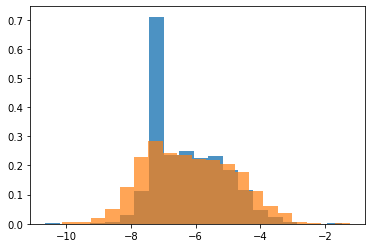

In [17]:
plt.hist([np.log10(e) for e in err1], bins=20, density=True, alpha=0.8)
plt.hist([np.log10(e) for e in err2], bins=20, density=True, alpha=0.7)

# Convert to PyTorch Tensor

Load the geography objects from disk and convert into a big Tensor for easy loading.

In [21]:
N = 2000
M = len(r1)

in_ch = ["zr", "zi", "dzr", "dzi", "ddzr", "ddzi", "line_eval_r", "line_eval_i", "w", "t"]
out_ch = ["riesz_r", "riesz_i"]

in_data = torch.zeros(N, len(in_ch), M)
out_data = torch.zeros(N, len(out_ch), M)

for i in range(N):
    print(f"{i+1}/{N} done", end="\r")
    data = torch.load(f"/home/emastr/phd/data/rounded_micro_domains_w_riesz_vectors/domain_hd_{i}.GPDomain")
    riesz = data.pop("riesz_vec")
    line_eval = data.pop("line_eval_adjoint")
    data.pop("riesz_vec_der")
    data.pop("line_eval_der_adjoint")
    
    geom = GPDomain.load(data)
    t, w = geom.grid.get_grid_and_weights()
    z = geom.eval_param(derivative=0)
    dz = geom.eval_param(derivative=1)
    ddz = geom.eval_param(derivative=2)
    
    n = dz/np.abs(dz)
    r = np.imag(dz * np.conjugate(ddz))/np.abs(dz)**3 * n
    
    # Set in data
    in_data[i, 0, :] = torch.from_numpy(np.real(z))
    in_data[i, 1, :] = torch.from_numpy(np.imag(z))
    in_data[i, 2, :] = torch.from_numpy(np.real(dz))
    in_data[i, 3, :] = torch.from_numpy(np.imag(dz))
    in_data[i, 4, :] = torch.from_numpy(np.real(ddz))
    in_data[i, 5, :] = torch.from_numpy(np.imag(ddz))
    in_data[i, 6, :] = torch.from_numpy(np.real(line_eval))
    in_data[i, 7, :] = torch.from_numpy(np.imag(line_eval))
    in_data[i, 8, :] = torch.from_numpy(w)
    in_data[i, 9, :] = torch.from_numpy(t)
    
    # set out data
    out_data[i, 0, :] = torch.from_numpy(np.real(riesz))
    out_data[i, 1, :] = torch.from_numpy(np.imag(riesz))
    

# Save data to file
data = {"X": in_data, "Y": out_data, "info": {"in_ch": in_ch, "out_ch": out_ch}}
torch.save(data, "/home/emastr/phd/data/problem_data_riesz2_TEST.torch")
    

In [22]:
mg.grid.integrate(lambda t: np.ones_like(t)) / (2*np.pi)

t,_ = mg.grid.get_grid_and_weights()
dz = mg.eval_param(derivative=1)

print(mg.grid.integrate(lambda t: np.abs(mg.eval_param(derivative=1))))
print(np.sum(np.abs(dz)[:-1] * (t[1:]-t[:-1])))

6.353230435067785
6.362851742436269
